Notebook for experimets with hierarchical clustering  

Using:
* sklearn.clustering.AgglomerativeClustering
* 

In [41]:
# Imports
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster
from scipy.spatial.distance import squareform
from collections import Counter

In [2]:
# Read data
responsories_all = pd.read_csv('../data/all-ci-responsories.csv', usecols=['cantus_id', 'siglum', 'source_id', 'feast_id'], dtype={'cantus_id':"str"})
antiphons_all = pd.read_csv('../data/all-ci-antiphons.csv', usecols=['cantus_id', 'siglum', 'source_id', 'feast_id'], dtype={'cantus_id':"str"})

sources = pd.read_csv('../data/sources-with-provenance-ids-and-two-centuries.csv', usecols=['provenance_id', 'drupal_path'])
feasts = pd.read_csv('../data/feast.csv', usecols=['id', 'name'])

data = pd.concat([responsories_all, antiphons_all])

In [ ]:
# Add info about cursus
row_sources = pd.read_csv('../data/sources-of-all-ci-antiphons_OPTIONAL-CENTURY.CSV', usecols=['drupal_path', 'cursus'])
row_sources['cursus'] = row_sources['cursus'].fillna('Unknown')
sources = pd.merge(left=sources, right=row_sources, how='inner')

In [3]:
# Metrics for measuring similarity of two sets ('chant sharingness')
def intersection_size(a : list, b : list):
    '''
    Function returns size of intersection of two sets
    '''
    return len(set(a).intersection(set(b)))

def Jaccard_metrics(a : list, b : list):
    '''
    Function returns value of Jaccard metrics applied on two sets
    '''
    if len(set(a) | set(b)) != 0:
        return len(set(a).intersection(set(b))) / len(set(a).union(set(b)))
    else:
        return 0

In [4]:
# Source translate to int for smooth matrix indexing 
from collections import OrderedDict

source_dict = OrderedDict()
i = 0
for id in sources['drupal_path']:
    source_dict[id] = i
    i += 1
    

def translate_source(source_id):
    return source_dict[source_id]

In [5]:
def get_distance_matrix_all(compare_func, sources):
    source_chants_dict = {}
    chants = data

    for source_id in sources:
        filt_source = chants['source_id'] == source_id
        source_chants_dict[source_id] = (chants[filt_source]['cantus_id']).tolist()
    
    distance_matrix = np.zeros([len(sources), len(sources)])
    for s_i in sources:
        for s_j in sources:
            distance_matrix[source_dict[s_i], source_dict[s_j]] = 1 - compare_func(source_chants_dict[s_i], source_chants_dict[s_j])
    #all_pairs = [(a, b) for idx, a in enumerate(source_chants_dict.keys()) for b in list(source_chants_dict.keys())[idx + 1:]]
    #distance_matrix = np.zeros([len(sources), len(sources)])
    #for s_i, s_j in all_pairs:
    #    distance_matrix[translate_source(s_i), translate_source(s_j)] = 1 - compare_func(source_chants_dict[s_i], source_chants_dict[s_j])
        
    return distance_matrix

In [6]:
# Via scipy
drupals = sources['drupal_path'].tolist()
dist_matrix = get_distance_matrix_all(Jaccard_metrics, drupals) 
dist_vector = squareform(dist_matrix, force='tovector', checks=False)

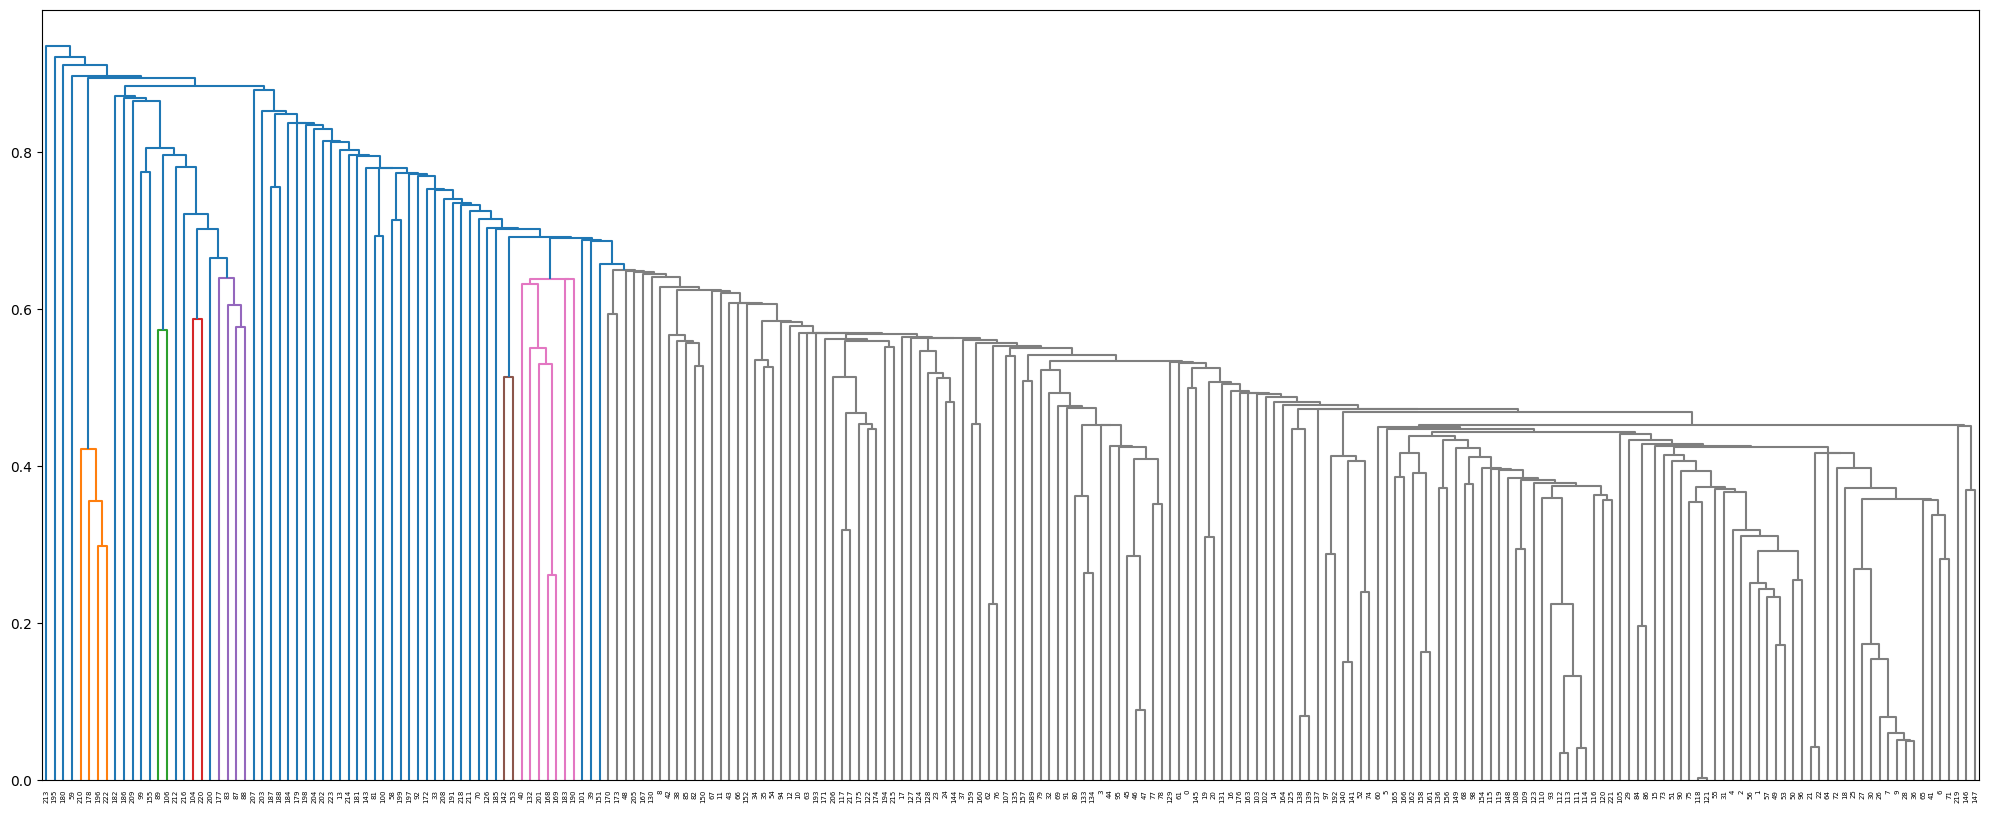

In [7]:
Z_single = linkage(dist_vector, 'single')
plt.figure(figsize=(25, 10))
dn = dendrogram(Z_single)
plt.title('SINGLE')
plt.show()

In [39]:
cuttree1 = cut_tree(Z_single, height=0.5)
freq1 = Counter()
for label in cuttree1:
    freq1[label[0]] += 1

print('number of labels in height = 0.5:', len(freq1))
print('labels distribution when height = 0.5:')
print(freq1.most_common())
print()

cuttree_over1 = cut_tree(Z_single, height=1.00000008)
freq_over1 = Counter()
for label in cuttree_over1:
    freq_over1[label[0]] += 1

print('number of labels when height over 1:', len(freq_over1))
print('labels distribution when height over 1:')
print(freq_over1.most_common())
print()

cuttree_5_cluster = cut_tree(Z_single, n_clusters=5)
freq_5 = Counter()
for label in cuttree_5_cluster:
    freq_5[label[0]] += 1

print('labels distribution when n_clusters = 5:')
print(freq_5.most_common())
print()

cuttree_6_cluster = cut_tree(Z_single, n_clusters=6)
freq_6 = Counter()
for label in cuttree_6_cluster:
    freq_6[label[0]] += 1

print('labels distribution when n_clusters = 6:')
print(freq_6.most_common())
print()

cuttree_2_cluster = cut_tree(Z_single, n_clusters=2)
freq_2 = Counter()
for label in cuttree_2_cluster:
    freq_2[label[0]] += 1

print('labels distribution when n_clusters = 2:')
print(freq_2.most_common())
print()

number of labels in height = 0.5: 158
labels distribution when height = 1:
[(5, 8), (1, 7), (20, 5), (60, 5), (12, 4), (47, 4), (72, 4), (31, 3), (32, 3), (45, 3), (49, 3), (118, 3), (2, 2), (3, 2), (4, 2), (15, 2), (16, 2), (18, 2), (19, 2), (21, 2), (35, 2), (41, 2), (53, 2), (62, 2), (66, 2), (73, 2), (74, 2), (76, 2), (77, 2), (88, 2), (90, 2), (91, 2), (95, 2), (96, 2), (103, 2), (104, 2), (108, 2), (110, 2), (0, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (13, 1), (14, 1), (17, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (33, 1), (34, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (42, 1), (43, 1), (44, 1), (46, 1), (48, 1), (50, 1), (51, 1), (52, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (61, 1), (63, 1), (64, 1), (65, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (75, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (89, 1), (92, 1), (93, 1), (94, 1), (97, 1), (9

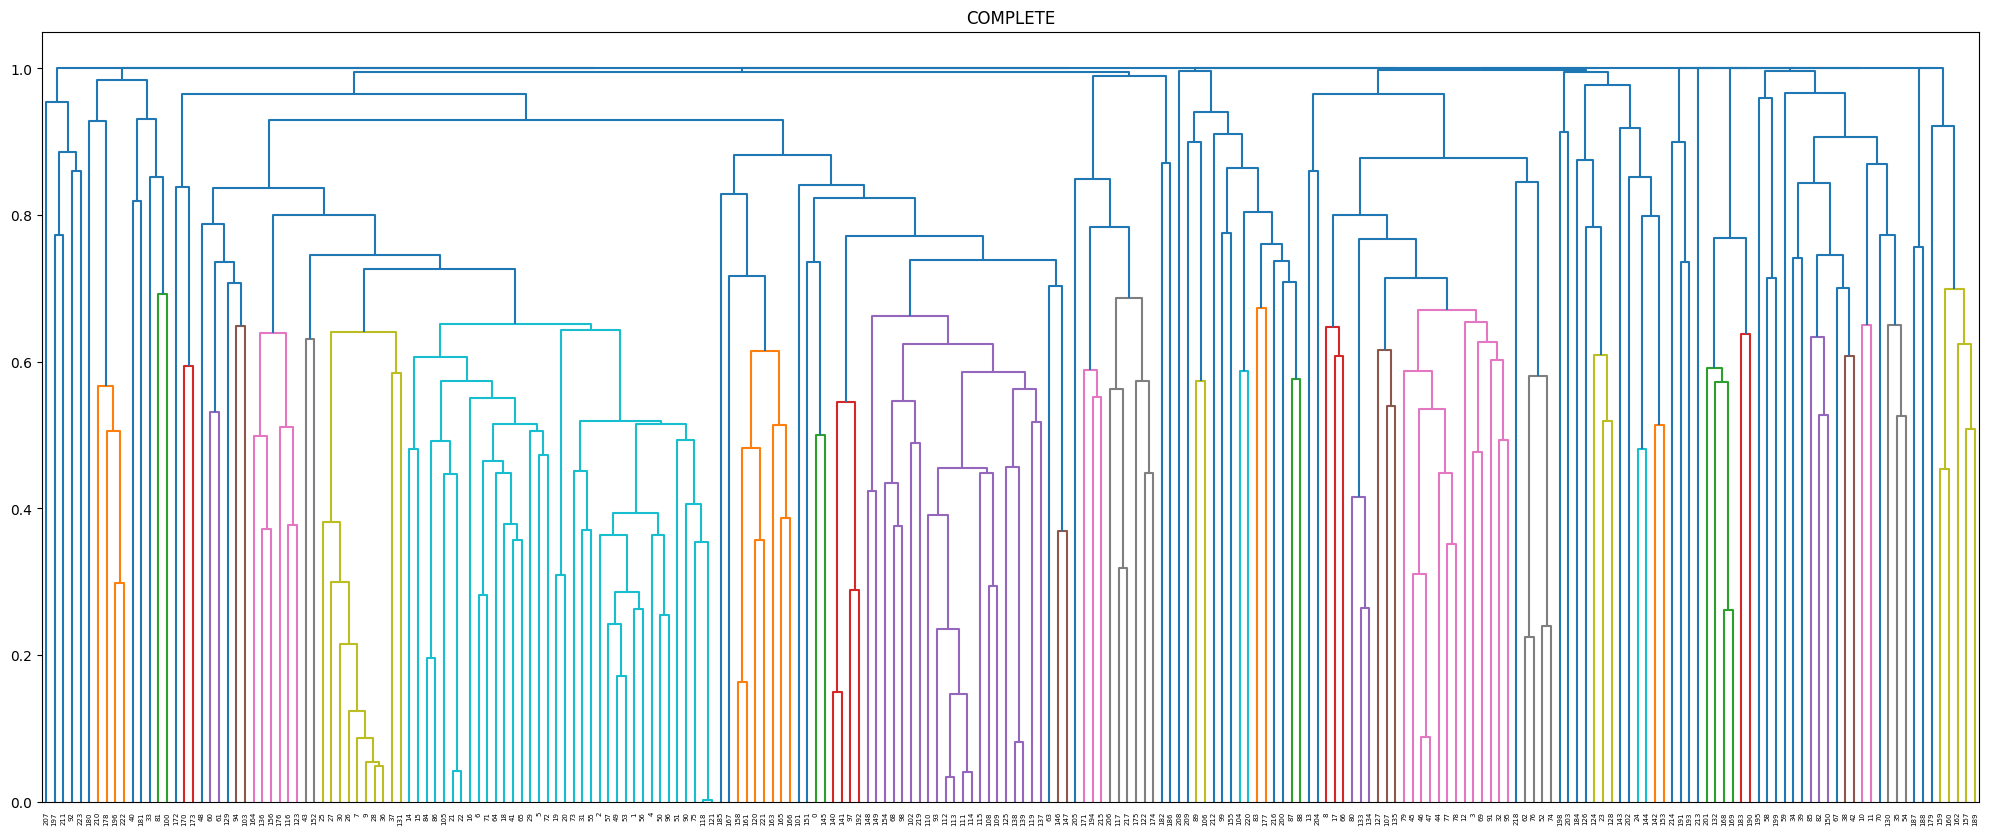

In [26]:
Z_complete = linkage(dist_vector, 'complete')
plt.figure(figsize=(25, 10))
den = dendrogram(Z_complete)
plt.title('COMPLETE')
plt.show()

In [40]:
cuttree_6_cluster = cut_tree(Z_complete, n_clusters=6)
freq_6 = Counter()
for label in cuttree_6_cluster:
    freq_6[label[0]] += 1

print('labels distribution when n_clusters = 6:')
print(freq_6.most_common())

cuttree1 = cut_tree(Z_complete, height=0.5)
freq1 = Counter()
for label in cuttree1:
    freq1[label[0]] += 1

print('number of labels in height = 0.5:', len(freq1))
print('labels distribution when height = 0.5:')
print(freq1.most_common())
print()

labels distribution when n_clusters = 6:
[(0, 116), (1, 42), (2, 36), (4, 15), (3, 10), (5, 5)]
number of labels in height = 0.5: 151
labels distribution when height = 1:
[(1, 9), (57, 9), (5, 8), (4, 6), (15, 5), (33, 5), (71, 4), (19, 3), (30, 3), (31, 3), (44, 3), (47, 3), (74, 3), (83, 3), (2, 2), (3, 2), (11, 2), (14, 2), (17, 2), (20, 2), (34, 2), (40, 2), (59, 2), (63, 2), (68, 2), (69, 2), (72, 2), (85, 2), (89, 2), (90, 2), (97, 2), (100, 2), (102, 2), (127, 2), (0, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (12, 1), (13, 1), (16, 1), (18, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (32, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (41, 1), (42, 1), (43, 1), (45, 1), (46, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (58, 1), (60, 1), (61, 1), (62, 1), (64, 1), (65, 1), (66, 1), (67, 1), (70, 1), (73, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (84, 1), (86, 1)

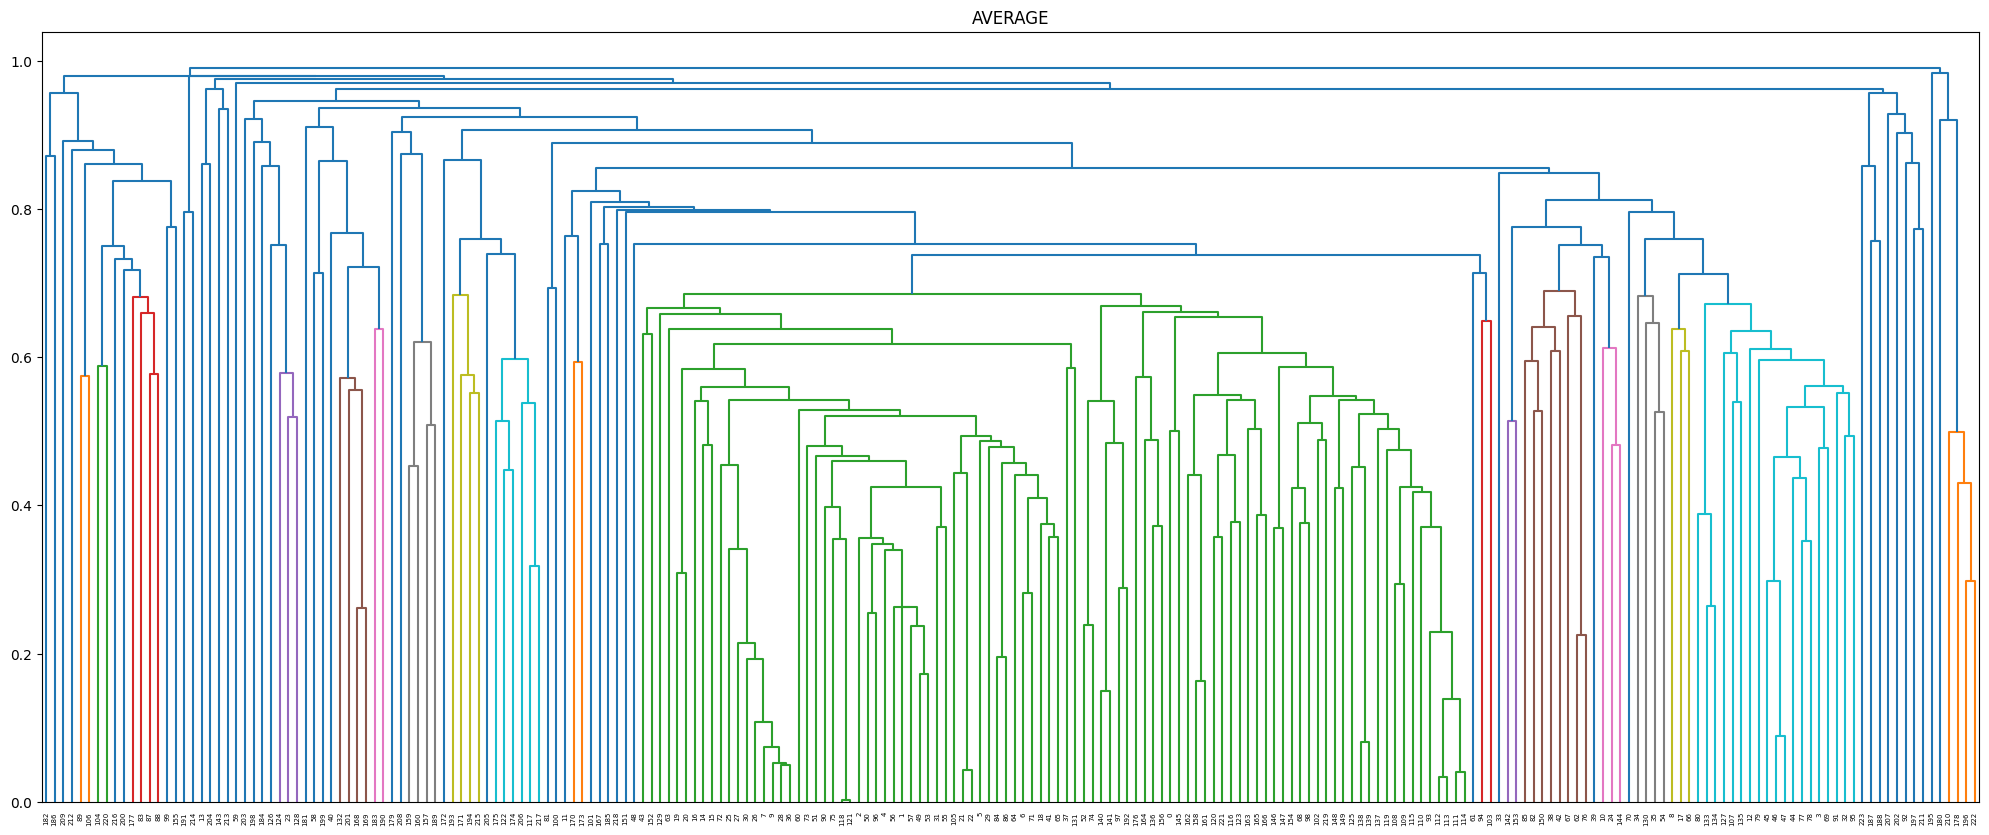

In [25]:
Z_average = linkage(dist_vector, 'average')
plt.figure(figsize=(25, 10))
dn = dendrogram(Z_average)
plt.title('AVERAGE')
plt.show()

In [35]:
cuttree_2_cluster = cut_tree(Z_average, n_clusters=2)
freq_2 = Counter()
for label in cuttree_2_cluster:
    freq_2[label[0]] += 1

print('labels distribution when n_clusters = 2:')
print(freq_2.most_common())

labels distribution when n_clusters = 2:
[(0, 218), (1, 6)]


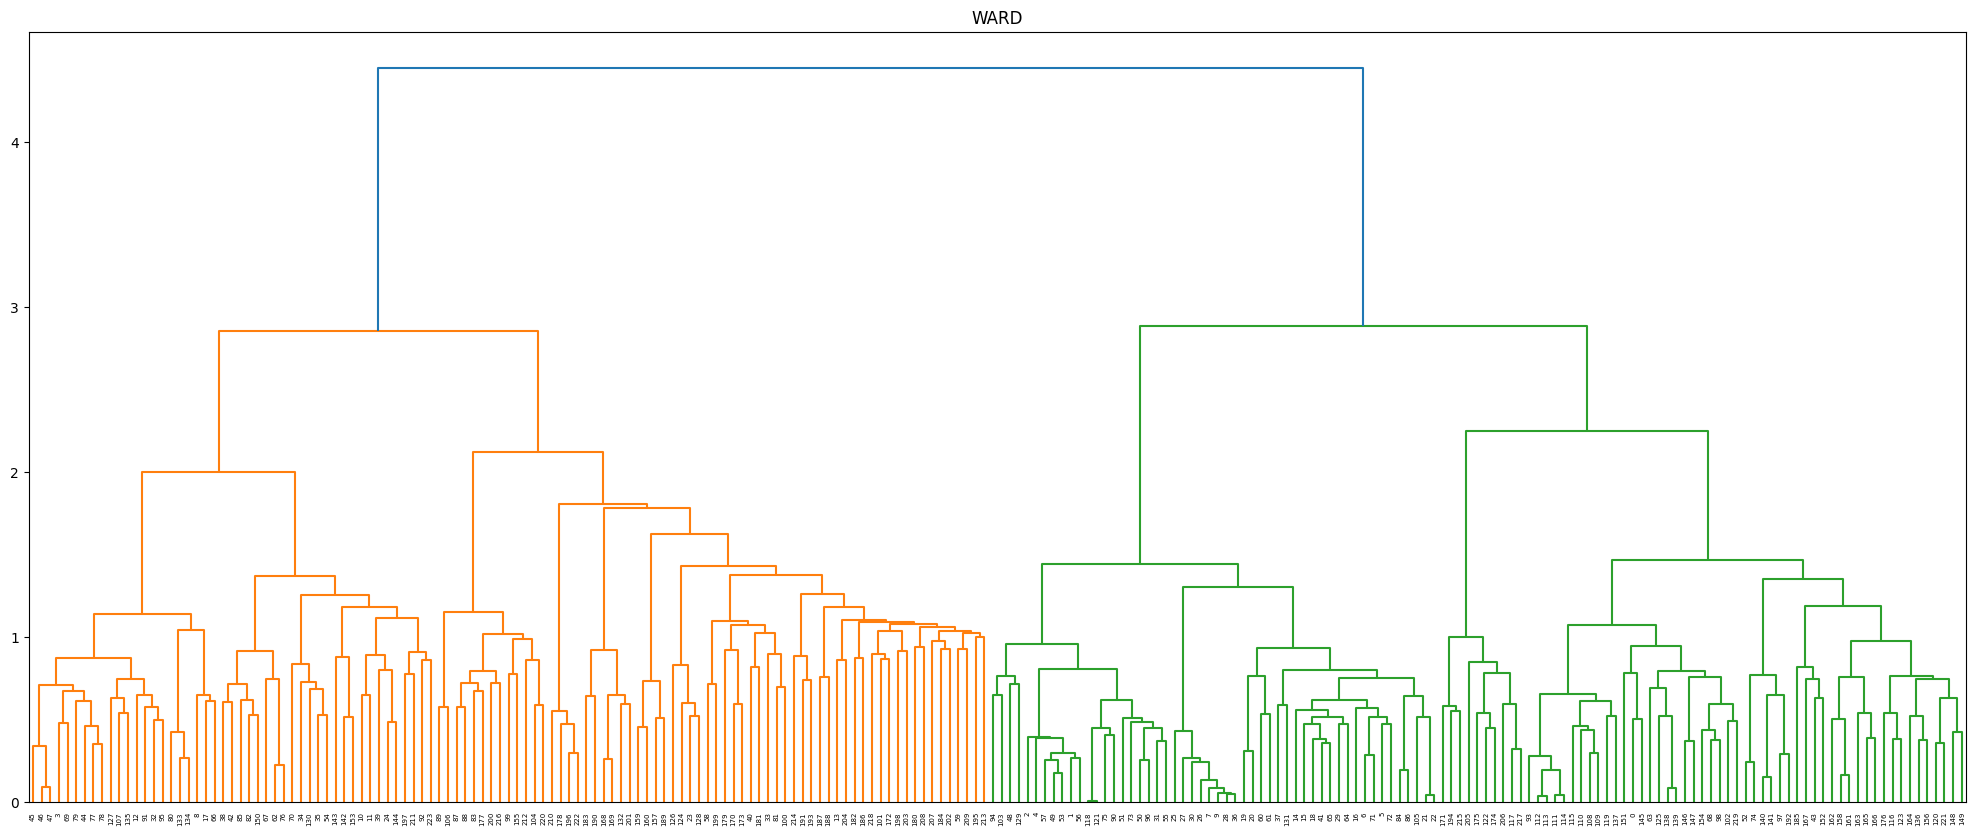

In [28]:
Z_ward = linkage(dist_vector, 'ward')
plt.figure(figsize=(25, 10))
dn = dendrogram(Z_ward)
plt.title('WARD')
plt.show()

In [46]:
cuttree_2_cluster = cut_tree(Z_ward, n_clusters=2)
freq_2 = Counter()
for label in cuttree_2_cluster:
    freq_2[label[0]] += 1

print('labels distribution when n_clusters = 2:')
print(freq_2.most_common())

fl = fcluster(Z_ward,t=2, criterion='maxclust')
print(fl)


labels distribution when n_clusters = 2:
[(0, 113), (1, 111)]
[2 2 2 1 2 2 2 2 1 2 1 1 1 1 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 1 1 1 2
 2 1 1 1 2 1 2 1 1 1 1 2 2 2 2 2 2 1 2 2 2 1 1 2 2 1 2 2 2 1 1 2 1 1 2 2 2
 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 2 2 1 2 2 2 1 1 1 2 2 1 2 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2 1 2 1 1 1 1 2 2 2 2 2 2 1 1 1 2 2 2
 2 2 1 2 2 1 2 1 2 1 2 1 1 2 2 2 2 2 2 2 1 1 1 2 1 1 2 2 2 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2
 1 1]


Part with using sklearn

In [9]:
def plot_dendrogram(model, trashold, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    fig,ax = plt.subplots()
    plt.title(trashold)
    dendrogram(linkage_matrix, **kwargs, ax=ax)


In [10]:
TRESHOLD_OPTIONS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

KeyboardInterrupt: 

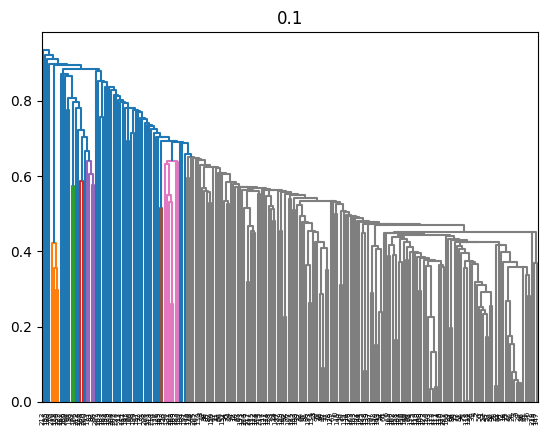

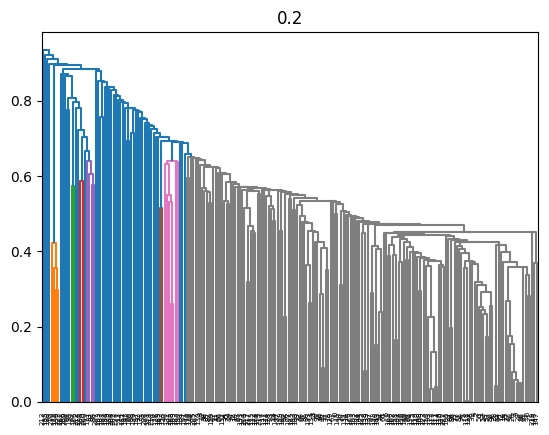

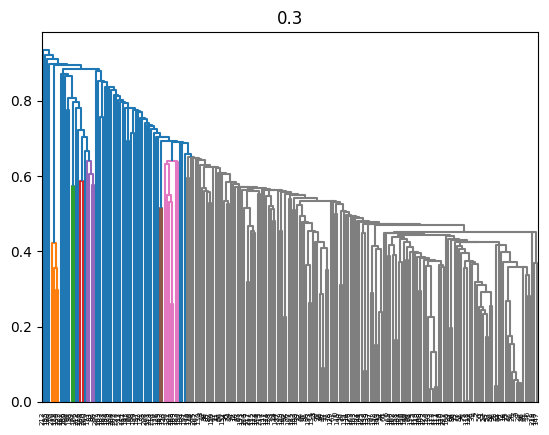

In [11]:
drupals = sources['drupal_path']

num_of_clusters = []
labels = []
for i in range(len(TRESHOLD_OPTIONS)):
    distance_matrix = get_distance_matrix_all(Jaccard_metrics, drupals)
    clustering = AgglomerativeClustering(distance_threshold=TRESHOLD_OPTIONS[i], linkage='single', n_clusters=None, metric='precomputed')
    clustering.fit(distance_matrix)
    num_of_clusters.append(clustering.n_clusters_)
    labels.append(clustering.labels_)
    plot_dendrogram(clustering, TRESHOLD_OPTIONS[i])

In [ ]:
print('number of sources:', len(sources))
print('number of clusters found for each treshold:', num_of_clusters)

number of sources: 224
number of clusters found for each treshold: [214, 207, 191, 159, 113, 68, 44, 21, 4]


In [ ]:
# Examine 0.5 depth

In [ ]:
print('labels', labels)

labels [array([112, 202, 189, 131, 188, 137, 196,   3, 121,   3, 151, 127, 145,
       167, 120, 146, 113, 161, 173, 190, 180,   8,   8, 108, 119, 197,
         3, 208,   3, 141, 211, 176, 115, 135, 193, 205,   3, 169, 171,
       195,  59, 186, 159, 129, 144,  97,   0,   0, 212, 209, 200, 158,
       203, 155, 174,  86, 201, 204, 163, 160, 134, 199, 206, 153, 152,
       182, 132, 125, 170, 122, 165, 150,  79, 154,  99, 184, 156, 185,
       133, 210, 178, 179, 101, 138, 207, 175, 172, 147, 142, 149, 164,
       123, 124, 102, 143,  72, 126, 194,  70, 111, 100, 191, 118, 117,
       139, 140,  61, 192,  95, 110,  89,   4,   2,   2,   4, 162, 177,
       187,   5,  80, 181,   5, 136, 168,  93,  67,  85,  81, 213, 198,
       114,  55, 183,  98,  96, 157,  42,  62,   1,   1, 105,  90, 107,
       103,  92, 116,  87,  68, 166, 148,  94,  50,  66,  39,  82,  91,
        69, 109, 104, 130,  44,  74,  40,  57,  60,  19,  76,  54,  49,
        84,  33,  83,  65,  46,  30, 128,  56,  27,  45,